In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!wget https://datasets.figure-eight.com/figure_eight_datasets/open-images/train-images-boxable.csv

In [0]:
!wget https://datasets.figure-eight.com/figure_eight_datasets/open-images/train-annotations-bbox.csv

In [0]:
%cd /content/drive/My Drive/OpenImages_v5
%pwd

/content/drive/My Drive/OpenImages_v5


'/content/drive/My Drive/OpenImages_v5'

In [0]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import requests
import os
import matplotlib
matplotlib.rc('figure', figsize=[10,7])
from matplotlib import patches
import os
import numpy as np
import PIL
from PIL import Image

In [0]:
def type_conversion(pds_obj):
    
    optimized_obj = pds_obj.copy()
    
    #selecting all columns with integer datatype
    int_col = pds_obj.select_dtypes(include=['int64'])
    if len(int_col.columns)==0:
        pass
    else:
        new_int = int_col.apply(pd.to_numeric,downcast='unsigned')
        optimized_obj[int_col.columns] = new_int
    
    #selecting all columns with float datatype
    float_col = pds_obj.select_dtypes('float')
    if len(float_col.columns)==0:
        pass
    else:
        new_float = float_col.apply(pd.to_numeric,downcast='float')
        optimized_obj[float_col.columns] = new_float
    #selecting all columns with object datatype
    objects = pds_obj.select_dtypes('object').copy()
    if len(objects.columns)==0:
        pass
    else:
        obj =objects.astype('category')
        optimized_obj[objects.columns]=obj
        
        
    return optimized_obj


        
#function to print the memory usage by the dataframe
def mem_info(df):
    print(df.info(memory_usage='deep'))

In [0]:
train_images = pd.read_csv('./train-images-boxable.csv')
mem_info(train_images)

df = pd.read_csv('./train-annotations-bbox.csv')
print(mem_info(df))
train_annot = type_conversion(df)
print(mem_info(train_annot))
del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743042 entries, 0 to 1743041
Data columns (total 2 columns):
image_name    object
image_url     object
dtypes: object(2)
memory usage: 390.6 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14610229 entries, 0 to 14610228
Data columns (total 13 columns):
ImageID        object
Source         object
LabelName      object
Confidence     int64
XMin           float64
XMax           float64
YMin           float64
YMax           float64
IsOccluded     int64
IsTruncated    int64
IsGroupOf      int64
IsDepiction    int64
IsInside       int64
dtypes: float64(4), int64(6), object(3)
memory usage: 3.8 GB
None
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14610229 entries, 0 to 14610228
Data columns (total 13 columns):
ImageID        category
Source         category
LabelName      category
Confidence     uint8
XMin           float32
XMax           float32
YMin           float32
YMax           float32
IsOccluded     int64
IsTruncat

In [0]:
train_annot['image_name']=train_annot['ImageID'].astype(str)+'.jpg'
train_annot['image_name'].head()

0    000002b66c9c498e.jpg
1    000002b66c9c498e.jpg
2    000002b66c9c498e.jpg
3    000002b66c9c498e.jpg
4    000002b66c9c498e.jpg
Name: image_name, dtype: object

In [0]:
labels = pd.read_csv('./class-descriptions-boxable.csv',names=['LabelName','labels'])
labels.head()

,LabelName,labels
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [0]:
train_annot = pd.merge(train_annot,labels,on=['LabelName'],how='left')
train_annot.head()
# conatiner and kitchenware labels are missing

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,image_name,labels
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0,000002b66c9c498e.jpg,Person
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0,000002b66c9c498e.jpg,Person
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0,000002b66c9c498e.jpg,Person
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0,000002b66c9c498e.jpg,Person
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0,000002b66c9c498e.jpg,Person


In [0]:
c=0
for i in range(len(train_images)):
  result = requests.get(train_images['image_url'][i], stream=True)
  image = result.raw.read()
  open('./Images/'+train_images['image_name'][i],"wb").write(image)
  c = c+1
  if c%200==0:
    print("Downloaded Images: ",c)
  if c == 1000:
    print("Finished downloading images.")
    break

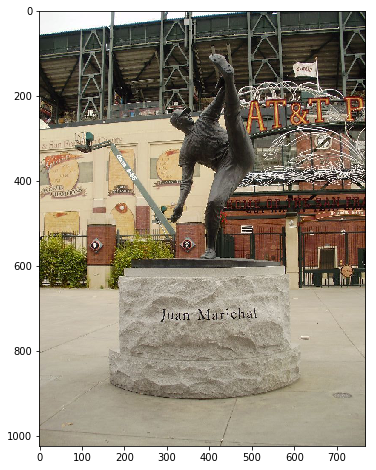

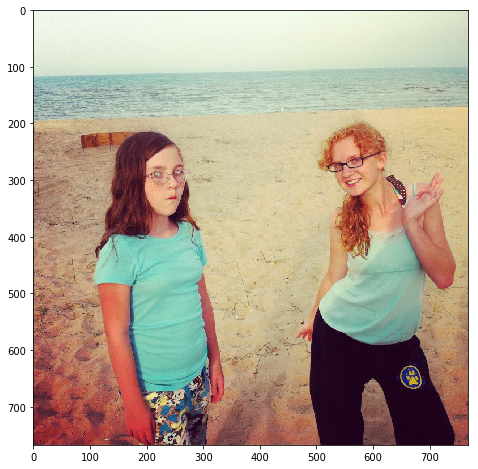

In [0]:
import os
import matplotlib
matplotlib.rc('figure', figsize=[12,8])

img_list = os.listdir('./Images')
  
for i in img_list[:2]: 
  img = plt.imread(os.path.join('./Images/'+ i))
  plt.figure()
  plt.imshow(img)

(471, 1024, 3)


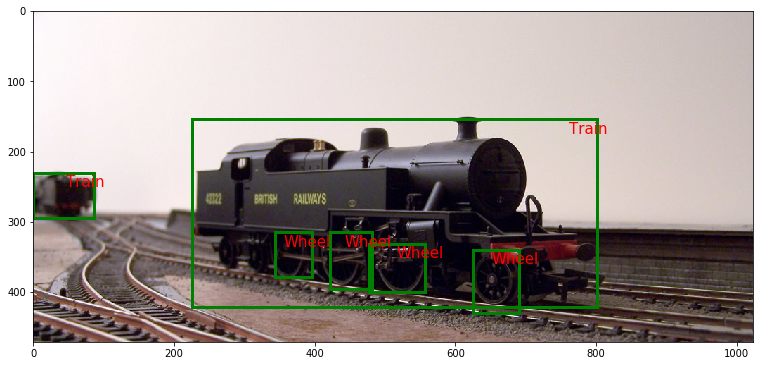

In [0]:
fig = plt.figure(figsize = (10,15))
#add axes to the image
ax = fig.add_axes([0,0,1,1])


# read and plot the image

colors = ['yellow','blue','red','green']


  
image = plt.imread('/content/drive/My Drive/OpenImages_v5/Images/df2ca09b5f03c7a9.jpg')
print(image.shape)



# iterating over the image for different objects
for _,row in train_annot[train_annot['image_name'] == 'df2ca09b5f03c7a9.jpg'].iterrows():
  xmin = row.XMin*image.shape[1]
  xmax = row.XMax*image.shape[1]
  ymin = row.YMin*image.shape[0]
  ymax = row.YMax*image.shape[0]
  
    
  width = xmax - xmin
  height = ymax - ymin

# Display the image
  ax.imshow(image)

# Create a Rectangle patch
  rect = patches.Rectangle((xmin,ymin),width,height,linewidth=3,edgecolor='g',facecolor='none')
  ax.annotate(row.labels, xy=(xmax-40,ymin+20),fontsize=15,color='r')

# Add the patch to the Axes
  ax.add_patch(rect)

  
  #image = cv2.rectangle(image,(int(xmin),int(ymin)),(int(xmin+width),int(ymin+height)),(0,0,255),3)
  #cv2_imshow(image)

plt.show()

In [0]:
#optional
train_data = pd.DataFrame(columns = train_annot.columns)
c =0 
for i in os.listdir('./Images/'):
  temp = train_annot[train_annot['image_name']==i]
  train_data=train_data.append(temp,ignore_index=True)
  
  c=c+1
  
  if c%100==0:
    print(c," rows done")

train_data.head()

In [0]:
train_data = pd.read_csv('train_data.csv')
train_data.shape

(8631, 16)

In [0]:
# downsizing images for training

basewidth = 300

for i in os.listdir('/content/drive/My Drive/OpenImages_v5/Images/'):
  
  img = Image.open(os.path.join('/content/drive/My Drive/OpenImages_v5/Images/'+i))
  wpercent = (basewidth / float(img.size[0]))
  hsize = int((float(img.size[1]) * float(wpercent)))
  img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
  img.save('/content/drive/My Drive/OpenImages_v5/down/'+i)

In [0]:
paths = pd.DataFrame()
#data = pd.DataFrame(columns=['format'])

paths['format'] = train_data['image_name']



# as the images are in train_images folder, add train_images before the image name
for i in range(paths.shape[0]):
  paths['format'][i] = '/content/drive/My Drive/OpenImages_v5/down/' + paths['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
c=0
for i in range(paths.shape[0]):
  
  if os.path.exists(paths['format'][i]):
  
    image = plt.imread(paths['format'][i])
    paths['format'][i] = paths['format'][i] + ',' + str(train_data['XMin'][i]*image.shape[1]) + ',' + str(train_data['YMin'][i]*image.shape[0]) + ',' + str(train_data['XMax'][i]*image.shape[1]) + ',' + str(train_data['YMax'][i]*image.shape[1]) + ',' + train_data['labels'][i]
    del image
    c=c+1
  else:
    c=c+1
    print('Image {} not found'.format(i))
  if c%500==0:
    print('{} rows processed'.format(c))

#del train_images
print('Before {}'.format(paths.shape))


data = paths.dropna()
print('After {}'.format(data.shape))
del paths
data.head()
data.to_csv('annotate.txt', header=None, index=None, sep=' ')

500 rows processed
1000 rows processed
1500 rows processed
2000 rows processed
2500 rows processed
3000 rows processed
3500 rows processed
4000 rows processed
4500 rows processed
5000 rows processed
5500 rows processed
6000 rows processed
6500 rows processed
7000 rows processed
7500 rows processed
8000 rows processed
8500 rows processed
Before (8631, 1)
After (8631, 1)


In [0]:
%cd ./keras-frcnn-master/
%pwd

/content/drive/My Drive/OpenImages_v5/keras-frcnn-master


'/content/drive/My Drive/OpenImages_v5/keras-frcnn-master'

In [0]:
from __future__ import division
import random
import pprint
import sys
import time
import numpy as np
from optparse import OptionParser
import pickle

from keras import backend as K
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Input
from keras.models import Model
from keras_frcnn import config, data_generators
from keras_frcnn import losses as losses
import keras_frcnn.roi_helpers as roi_helpers
from keras.utils import generic_utils

Using TensorFlow backend.


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
%pip install keras==2.1.6

     |████████████████████████████████| 348kB 5.1MB/s 
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [0]:
def get_data(input_path):
	found_bg = False
	all_imgs = {}

	classes_count = {}

	class_mapping = {}

	visualise = True
	
	with open(input_path,'r') as f:

		print('Parsing annotation files')
		for line in f:
			#print(line)
			line_split = line.strip().split(',')
			(filename,x1,y1,x2,y2,class_name) = line_split
			filename = filename.split('"')[1]

			class_name = class_name.split('"')[0]
      
			if class_name not in classes_count:
				classes_count[class_name] = 1
			else:
				classes_count[class_name] += 1

			if class_name not in class_mapping:
				if class_name == 'bg' and found_bg == False:
					print('Found class name with special name bg. Will be treated as a background region (this is usually for hard negative mining).')
					found_bg = True
				class_mapping[class_name] = len(class_mapping)

			if filename not in all_imgs:
				all_imgs[filename] = {}
				
				img = cv2.imread(filename)
				(rows,cols) = img.shape[:2]
				all_imgs[filename]['filepath'] = filename
				all_imgs[filename]['width'] = cols
				all_imgs[filename]['height'] = rows
				all_imgs[filename]['bboxes'] = []
				if np.random.randint(0,6) > 0:
					all_imgs[filename]['imageset'] = 'trainval'
				else:
					all_imgs[filename]['imageset'] = 'test'

			all_imgs[filename]['bboxes'].append({'class': class_name, 'x1': int(float(x1)), 'x2': int(float(x2)), 'y1': int(float(y1)), 'y2': int(float(y2))})


		all_data = []
		for key in all_imgs:
			all_data.append(all_imgs[key])
		
		# make sure the bg class is last in the list
		if found_bg:
			if class_mapping['bg'] != len(class_mapping) - 1:
				key_to_switch = [key for key in class_mapping.keys() if class_mapping[key] == len(class_mapping)-1][0]
				val_to_switch = class_mapping['bg']
				class_mapping['bg'] = len(class_mapping) - 1
				class_mapping[key_to_switch] = val_to_switch

		
		return all_data, classes_count, class_mapping
      
			
			




In [0]:
sys.setrecursionlimit(40000)
#num_epochs=500
record_path='/content/drive/My Drive/OpenImages_v5/keras-frcnn-master/records.csv'


C = config.Config()

C.use_horizontal_flips = bool("False")
C.use_vertical_flips = bool("False")
C.rot_90 = bool("False")

C.model_path = ("./model_frcnn.hdf5")
C.num_rois = int(15)


from keras_frcnn import resnet as nn
C.network = 'resnet50'



C.base_net_weights = nn.get_weight_path()

all_imgs, classes_count, class_mapping = get_data("/content/drive/My Drive/OpenImages_v5/annotate.txt")

if 'bg' not in classes_count:
	classes_count['bg'] = 0
	class_mapping['bg'] = len(class_mapping)

C.class_mapping = class_mapping

inv_map = {v: k for k, v in class_mapping.items()}

print('Training images per class:')
pprint.pprint(classes_count)
print('Num classes (including bg) = {}'.format(len(classes_count)))

config_output_filename = "config.pickle"

with open(config_output_filename, 'wb') as config_f:
	pickle.dump(C,config_f)
	print('Config has been written to {}, and can be loaded when testing to ensure correct results'.format(config_output_filename))

random.shuffle(all_imgs)

num_imgs = len(all_imgs)

train_imgs = [s for s in all_imgs if s['imageset'] == 'trainval']
val_imgs = [s for s in all_imgs if s['imageset'] == 'test']

print('Num train samples {}'.format(len(train_imgs)))
print('Num val samples {}'.format(len(val_imgs)))


data_gen_train = data_generators.get_anchor_gt(train_imgs, classes_count, C, nn.get_img_output_length, K.image_dim_ordering(), mode='train')
data_gen_val = data_generators.get_anchor_gt(val_imgs, classes_count, C, nn.get_img_output_length,K.image_dim_ordering(), mode='val')

if K.image_dim_ordering() == 'th':
	input_shape_img = (3, None, None)
else:
	input_shape_img = (None, None, 3)

img_input = Input(shape=input_shape_img)
roi_input = Input(shape=(None, 4))

# define the base network (resnet here, can be VGG, Inception, etc)
shared_layers = nn.nn_base(img_input, trainable=True)

# define the RPN, built on the base layers
num_anchors = len(C.anchor_box_scales) * len(C.anchor_box_ratios)
rpn = nn.rpn(shared_layers, num_anchors)

classifier = nn.classifier(shared_layers, roi_input, C.num_rois, nb_classes=len(classes_count), trainable=True)

model_rpn = Model(img_input, rpn[:2])
model_classifier = Model([img_input, roi_input], classifier)

# this is a model that holds both the RPN and the classifier, used to load/save weights for the models
model_all = Model([img_input, roi_input], rpn[:2] + classifier)

if not os.path.isfile(C.model_path):
    #If this is the begin of the training, load the pre-traind base network such as vgg-16
    try:
        
        print('Try loading weights from {}'.format(C.base_net_weights))
        print('No train checkpoints found')
        print('Starting fresh ')
        model_rpn.load_weights(C.base_net_weights, by_name=True)
        model_classifier.load_weights(C.base_net_weights, by_name=True)
    except:
      pass
#        print('Could not load pretrained model weights. Weights can be found in the keras application folder \
#            https://github.com/fchollet/keras/tree/master/keras/applications')

    
    # Create the record.csv file to record losses, acc and mAP
    record_df = pd.DataFrame(columns=['mean_overlapping_bboxes', 'class_acc', 'loss_rpn_cls', 'loss_rpn_regr', 'loss_class_cls', 'loss_class_regr', 'curr_loss', 'elapsed_time', 'mAP'])
else:
    # If this is a continued training, load the trained model from before
    print('Continue training based on previous trained model')
    print('Loading weights from {}'.format(C.model_path))
    model_rpn.load_weights(C.model_path, by_name=True)
    model_classifier.load_weights(C.model_path, by_name=True)
    print('{} model loaded'.format(C.model_path))
    
    # Load the records
    record_df = pd.read_csv(record_path)

    r_mean_overlapping_bboxes = record_df['mean_overlapping_bboxes']
    r_class_acc = record_df['class_acc']
    r_loss_rpn_cls = record_df['loss_rpn_cls']
    r_loss_rpn_regr = record_df['loss_rpn_regr']
    r_loss_class_cls = record_df['loss_class_cls']
    r_loss_class_regr = record_df['loss_class_regr']
    r_curr_loss = record_df['curr_loss']
    r_elapsed_time = record_df['elapsed_time']
    r_mAP = record_df['mAP']

    print('Already train %dK batches'% (len(record_df)))
    
optimizer = Adam(lr=1e-5)
optimizer_classifier = Adam(lr=1e-5)
model_rpn.compile(optimizer=optimizer, loss=[losses.rpn_loss_cls(num_anchors), losses.rpn_loss_regr(num_anchors)])
model_classifier.compile(optimizer=optimizer_classifier, loss=[losses.class_loss_cls, losses.class_loss_regr(len(classes_count)-1)], metrics={'dense_class_{}'.format(len(classes_count)): 'accuracy'})
model_all.compile(optimizer='sgd', loss='mae')


# Training setting
total_epochs = len(record_df)
r_epochs = len(record_df)

epoch_length = 1000
num_epochs = 337
iter_num = 0

total_epochs += num_epochs

losses = np.zeros((epoch_length, 5))
rpn_accuracy_rpn_monitor = []
rpn_accuracy_for_epoch = []

if len(record_df)==0:
    best_loss = np.Inf
else:
    best_loss = np.min(r_curr_loss)



#class_mapping_inv = {v: k for k, v in class_mapping.items()}


print('Training begins')
start_time = time.time()

for epoch_num in range(num_epochs):

	progbar = generic_utils.Progbar(epoch_length)
  
	print("new loop")
	print('Epoch {}/{}'.format(r_epochs + 1, total_epochs))
	r_epochs = r_epochs+1

	while True:
		try:
      

			if len(rpn_accuracy_rpn_monitor) == epoch_length and C.verbose:
				mean_overlapping_bboxes = float(sum(rpn_accuracy_rpn_monitor))/len(rpn_accuracy_rpn_monitor)
				rpn_accuracy_rpn_monitor = []
				print('Average number of overlapping bounding boxes from RPN = {} for {} previous iterations'.format(mean_overlapping_bboxes, epoch_length))
				if mean_overlapping_bboxes == 0:
					print('RPN is not producing bounding boxes that overlap the ground truth boxes. Check RPN settings or keep training.')

			X, Y, img_data = next(data_gen_train)

			loss_rpn = model_rpn.train_on_batch(X, Y)

			P_rpn = model_rpn.predict_on_batch(X)

			R = roi_helpers.rpn_to_roi(P_rpn[0], P_rpn[1], C, K.image_dim_ordering(), use_regr=True, overlap_thresh=0.7, max_boxes=300)
			# note: calc_iou converts from (x1,y1,x2,y2) to (x,y,w,h) format
			X2, Y1, Y2, IouS = roi_helpers.calc_iou(R, img_data, C, class_mapping)

			if X2 is None:
				rpn_accuracy_rpn_monitor.append(0)
				rpn_accuracy_for_epoch.append(0)
				continue

			neg_samples = np.where(Y1[0, :, -1] == 1)
			pos_samples = np.where(Y1[0, :, -1] == 0)

			if len(neg_samples) > 0:
				neg_samples = neg_samples[0]
			else:
				neg_samples = []

			if len(pos_samples) > 0:
				pos_samples = pos_samples[0]
			else:
				pos_samples = []
			
			rpn_accuracy_rpn_monitor.append(len(pos_samples))
			rpn_accuracy_for_epoch.append((len(pos_samples)))

			if C.num_rois > 1:
				if len(pos_samples) < C.num_rois//2:
					selected_pos_samples = pos_samples.tolist()
				else:
					selected_pos_samples = np.random.choice(pos_samples, C.num_rois//2, replace=False).tolist()
				try:
					selected_neg_samples = np.random.choice(neg_samples, C.num_rois - len(selected_pos_samples), replace=False).tolist()
				except:
					selected_neg_samples = np.random.choice(neg_samples, C.num_rois - len(selected_pos_samples), replace=True).tolist()

				sel_samples = selected_pos_samples + selected_neg_samples
			else:
				# in the extreme case where num_rois = 1, we pick a random pos or neg sample
				selected_pos_samples = pos_samples.tolist()
				selected_neg_samples = neg_samples.tolist()
				if np.random.randint(0, 2):
					sel_samples = random.choice(neg_samples)
				else:
					sel_samples = random.choice(pos_samples)

			loss_class = model_classifier.train_on_batch([X, X2[:, sel_samples, :]], [Y1[:, sel_samples, :], Y2[:, sel_samples, :]])

			losses[iter_num, 0] = loss_rpn[1]
			losses[iter_num, 1] = loss_rpn[2]

			losses[iter_num, 2] = loss_class[1]
			losses[iter_num, 3] = loss_class[2]
			losses[iter_num, 4] = loss_class[3]

			progbar.update(iter_num+1, [('rpn_cls', losses[iter_num, 0]), ('rpn_regr', losses[iter_num, 1]),
									  ('detector_cls', losses[iter_num, 2]), ('detector_regr', losses[iter_num, 3])])

			iter_num += 1
			
			if iter_num == epoch_length:
				loss_rpn_cls = np.mean(losses[:, 0])
				loss_rpn_regr = np.mean(losses[:, 1])
				loss_class_cls = np.mean(losses[:, 2])
				loss_class_regr = np.mean(losses[:, 3])
				class_acc = np.mean(losses[:, 4])

				mean_overlapping_bboxes = float(sum(rpn_accuracy_for_epoch)) / len(rpn_accuracy_for_epoch)
				rpn_accuracy_for_epoch = []

				if C.verbose:
					print('Mean number of bounding boxes from RPN overlapping ground truth boxes: {}'.format(mean_overlapping_bboxes))
					print('Classifier accuracy for bounding boxes from RPN: {}'.format(class_acc))
					print('Loss RPN classifier: {}'.format(loss_rpn_cls))
					print('Loss RPN regression: {}'.format(loss_rpn_regr))
					print('Loss Detector classifier: {}'.format(loss_class_cls))
					print('Loss Detector regression: {}'.format(loss_class_regr))
					print('Elapsed time: {}'.format(time.time() - start_time))
					elapsed_time = (time.time()-start_time)/60

				curr_loss = loss_rpn_cls + loss_rpn_regr + loss_class_cls + loss_class_regr
				iter_num = 0
				start_time = time.time()

				if curr_loss < best_loss:
					if C.verbose:
						print('Total loss decreased from {} to {}, saving weights'.format(best_loss,curr_loss))
					best_loss = curr_loss
					model_all.save_weights(C.model_path)
        
				new_row = {'mean_overlapping_bboxes':round(mean_overlapping_bboxes, 3), 
				'class_acc':round(class_acc, 3), 
				'loss_rpn_cls':round(loss_rpn_cls, 3), 
				'loss_rpn_regr':round(loss_rpn_regr, 3), 
				'loss_class_cls':round(loss_class_cls, 3), 
				'loss_class_regr':round(loss_class_regr, 3), 
				'curr_loss':round(curr_loss, 3), 
				'elapsed_time':round(elapsed_time, 3), 
				'mAP': 0}
        
				record_df = record_df.append(new_row, ignore_index=True)
				record_df.to_csv(record_path, index=0)


				break
				print("loop end")

		except Exception as e:
			print('Exception: {}'.format(e))
			continue

print('Training complete, exiting.')





Parsing annotation files
Training images per class:
{'Accordion': 1,
 'Aircraft': 3,
 'Airplane': 17,
 'Animal': 5,
 'Apple': 3,
 'Auto part': 12,
 'Backpack': 3,
 'Baked goods': 20,
 'Ball': 6,
 'Balloon': 3,
 'Barrel': 9,
 'Baseball bat': 2,
 'Baseball glove': 1,
 'Bed': 4,
 'Bee': 2,
 'Beer': 7,
 'Beetle': 1,
 'Bench': 1,
 'Bicycle': 22,
 'Bicycle helmet': 10,
 'Bicycle wheel': 51,
 'Billboard': 6,
 'Bird': 13,
 'Boat': 66,
 'Book': 53,
 'Bookcase': 9,
 'Boot': 6,
 'Bottle': 15,
 'Bowl': 1,
 'Boy': 53,
 'Brassiere': 7,
 'Bread': 4,
 'Bronze sculpture': 1,
 'Building': 104,
 'Bus': 6,
 'Bust': 1,
 'Butterfly': 2,
 'Cabinetry': 1,
 'Cake': 1,
 'Camera': 4,
 'Candy': 1,
 'Canoe': 1,
 'Car': 151,
 'Carnivore': 1,
 'Castle': 6,
 'Cat': 12,
 'Cat furniture': 1,
 'Cattle': 2,
 'Cello': 1,
 'Chair': 83,
 'Christmas tree': 2,
 'Clock': 1,
 'Clothing': 914,
 'Coat': 6,
 'Coffee cup': 1,
 'Coffee table': 3,
 'Coin': 4,
 'Computer keyboard': 1,
 'Computer monitor': 41,
 'Convenience store': 1,


W0730 01:56:12.723802 140494014781312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:68: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 01:56:12.766707 140494014781312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:508: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 01:56:12.784182 140494014781312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3837: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0730 01:56:12.849793 140494014781312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3661: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Config has been written to config.pickle, and can be loaded when testing to ensure correct results
Num train samples 826
Num val samples 174


W0730 01:56:14.854708 140494014781312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3814: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0730 01:56:14.914625 140494014781312 deprecation_wrapper.py:119] From /content/drive/My Drive/OpenImages_v5/keras-frcnn-master/keras_frcnn/RoiPoolingConv.py:105: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.

W0730 01:56:15.768509 140494014781312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3665: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



Continue training based on previous trained model
Loading weights from ./model_frcnn.hdf5

W0730 01:56:24.455909 140494014781312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:168: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.




./model_frcnn.hdf5 model loaded


W0730 01:56:30.565073 140494014781312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:757: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0730 01:56:30.591937 140494014781312 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Already train 167K batches
Training begins
new loop
Epoch 168/504
 649/1000 [==================>...........] - ETA: 16:23 - rpn_cls: 3.9617 - rpn_regr: 0.4072 - detector_cls: 0.9108 - detector_regr: 0.3587

{0: 'Person', 1: 'Sports equipment', 2: 'Trousers', 3: 'Woman', 4: 'Girl', 5: 'Human face', 6: 'Glasses', 7: 'Boat', 8: 'Tree', 9: 'Castle', 10: 'Footwear', 11: 'Helmet', 12: 'Car', 13: 'Man', 14: 'Dress', 15: 'Goat', 16: 'Poster', 17: 'Rose', 18: 'Boy', 19: 'Sports uniform', 20: 'Baseball bat', 21: 'Baseball glove', 22: 'Jacket', 23: 'Roller skates', 24: 'Traffic sign', 25: 'Animal', 26: 'Human hair', 27: 'Human head', 28: 'Human eye', 29: 'Human mouth', 30: 'Human body', 31: 'Human leg', 32: 'Human arm', 33: 'Human nose', 34: 'Clothing', 35: 'Building', 36: 'House', 37: 'Curtain', 38: 'Bed', 39: 'Window', 40: 'Bird', 41: 'Cat', 42: 'Taxi', 43: 'Plant', 44: 'Wheel', 45: 'Strawberry', 46: 'Fashion accessory', 47: 'Drink', 48: 'Tableware', 49: 'Coat', 50: 'Handbag', 51: 'Jeans', 52: 'Boot', 53: 'Food', 54: 'Fast food', 55: 'Pastry', 56: 'Camera', 57: 'Tower', 58: 'Chair', 59: 'Dog', 60: 'Bicycle', 61: 'Bicycle wheel', 62: 'Bicycle helmet', 63: 'Train', 64: 'Table', 65: 'Bench', 66: 'Kit

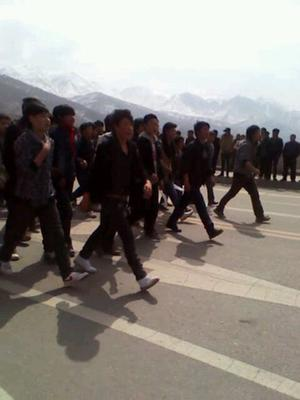

dec9c9645076fc17.jpg
Elapsed time = 3.6960387229919434
[('Dog', 99.70393180847168), ('Dog', 98.7011969089508), ('Dog', 95.95414400100708), ('Dog', 80.28436303138733)]


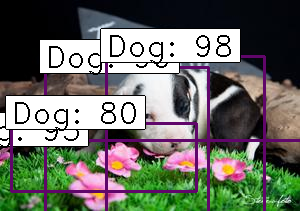

decd1ab3ff64da71.jpg
Elapsed time = 2.911564588546753
[('Door', 86.23380661010742)]


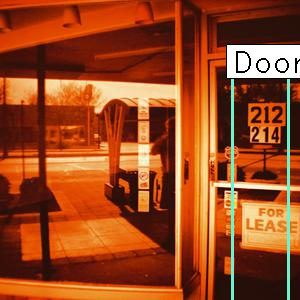

decef02a3bba1227.jpg
Elapsed time = 3.6805481910705566
[]


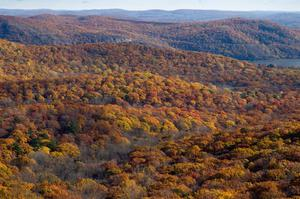

ded1983c6231dd12.jpg
Elapsed time = 3.5038132667541504
[('Roller skates', 85.11334657669067)]


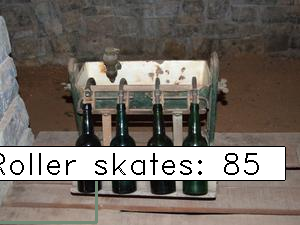

ded2611fbaf699ca.jpg
Elapsed time = 3.572514533996582
[('Desk', 82.2684109210968), ('Human head', 84.4367504119873), ('Microphone', 81.21575713157654)]


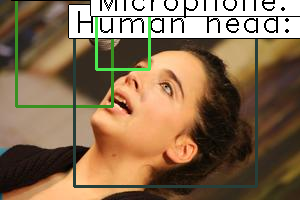

ded745c988db0d8e.jpg
Elapsed time = 1.0860073566436768
[('Convenience store', 92.03233122825623), ('Book', 93.8213586807251), ('Book', 81.81819319725037), ('Book', 80.94677329063416)]


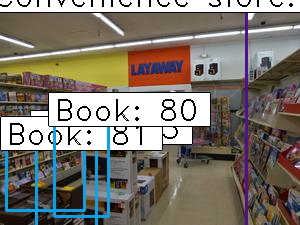

deeea0c2e6ad5f1a.jpg
Elapsed time = 1.2511823177337646
[]


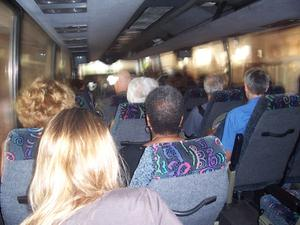

def4211ce524f061.jpg
Elapsed time = 3.153029441833496
[('Flower', 98.19872975349426), ('Flower', 97.03365564346313), ('Flower', 87.04319596290588), ('Flower', 86.18654608726501), ('Flower', 83.95230174064636), ('Flower', 83.72877836227417), ('Flower', 81.06832504272461), ('Flower', 80.22069334983826)]


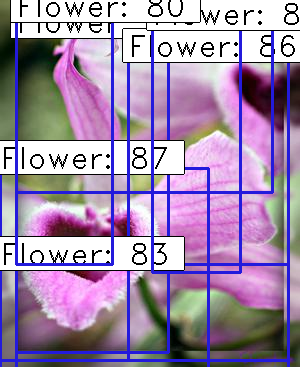

defba8b37f38bce2.jpg
Elapsed time = 3.2720160484313965
[]


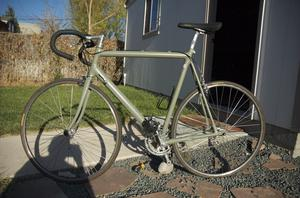

defe88bd92f2e6ca.jpg
Elapsed time = 1.1365344524383545
[]


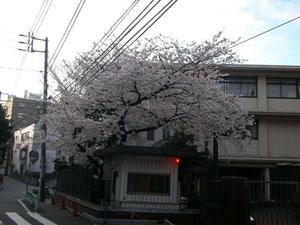

df0c423a5328fd66.jpg
Elapsed time = 1.1166293621063232
[('Building', 97.73280620574951), ('Building', 87.85558938980103)]


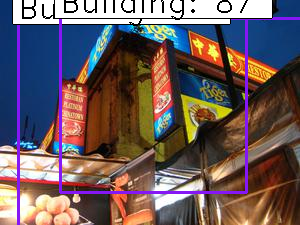

df1d53dc9ac2da10.jpg
Elapsed time = 4.098921298980713
[('Car', 94.04204487800598), ('Car', 86.69087886810303), ('Car', 83.0005407333374)]


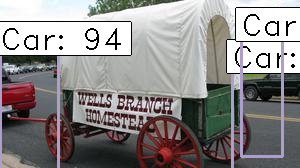

df2ca09b5f03c7a9.jpg
Elapsed time = 4.826374053955078
[]


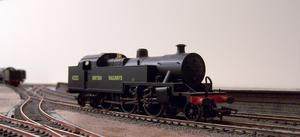

df3b0c784830ab69.jpg
Elapsed time = 4.020017623901367
[('Tree', 82.32590556144714)]


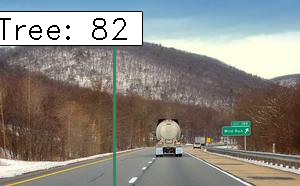

In [0]:
from __future__ import division
import os
import cv2
import numpy as np
import sys
import pickle
import time
from keras_frcnn import config
from keras import backend as K
from keras.layers import Input
from keras.models import Model
from keras_frcnn import roi_helpers
from google.colab.patches import cv2_imshow

sys.setrecursionlimit(40000)



test_path = "/content/drive/My Drive/OpenImages_v5/test/"

if not test_path:   # if filename is not given
	print('Error: path to test data must be specified. Pass --path to command line')


config_output_filename = "./config.pickle"

num_rois = 15

with open(config_output_filename, 'rb') as f_in:
	C = pickle.load(f_in)

if C.network == 'resnet50':
	import keras_frcnn.resnet as nn
elif C.network == 'vgg':
	import keras_frcnn.vgg as nn

# turn off any data augmentation at test time
C.use_horizontal_flips = False
C.use_vertical_flips = False
C.rot_90 = False

img_path = test_path

def format_img_size(img, C):
	""" formats the image size based on config """
	img_min_side = float(C.im_size)
	(height,width,_) = img.shape
		
	if width <= height:
		ratio = img_min_side/width
		new_height = int(ratio * height)
		new_width = int(img_min_side)
	else:
		ratio = img_min_side/height
		new_width = int(ratio * width)
		new_height = int(img_min_side)
	img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
	return img, ratio	

def format_img_channels(img, C):
	""" formats the image channels based on config """
	img = img[:, :, (2, 1, 0)]
	img = img.astype(np.float32)
	img[:, :, 0] -= C.img_channel_mean[0]
	img[:, :, 1] -= C.img_channel_mean[1]
	img[:, :, 2] -= C.img_channel_mean[2]
	img /= C.img_scaling_factor
	img = np.transpose(img, (2, 0, 1))
	img = np.expand_dims(img, axis=0)
	return img

def format_img(img, C):
	""" formats an image for model prediction based on config """
	img, ratio = format_img_size(img, C)
	img = format_img_channels(img, C)
	return img, ratio

# Method to transform the coordinates of the bounding box to its original size
def get_real_coordinates(ratio, x1, y1, x2, y2):

	real_x1 = int(round(x1 // ratio))
	real_y1 = int(round(y1 // ratio))
	real_x2 = int(round(x2 // ratio))
	real_y2 = int(round(y2 // ratio))

	return (real_x1, real_y1, real_x2 ,real_y2)

class_mapping = C.class_mapping

if 'bg' not in class_mapping:
	class_mapping['bg'] = len(class_mapping)

class_mapping = {v: k for k, v in class_mapping.items()}
print(class_mapping)
class_to_color = {class_mapping[v]: np.random.randint(0, 255, 3) for v in class_mapping}
C.num_rois = int(num_rois)

if C.network == 'resnet50':
	num_features = 1024
elif C.network == 'vgg':
	num_features = 512

if K.image_dim_ordering() == 'th':
	input_shape_img = (3, None, None)
	input_shape_features = (num_features, None, None)
else:
	input_shape_img = (None, None, 3)
	input_shape_features = (None, None, num_features)


img_input = Input(shape=input_shape_img)
roi_input = Input(shape=(C.num_rois, 4))
feature_map_input = Input(shape=input_shape_features)

# define the base network (resnet here, can be VGG, Inception, etc)
shared_layers = nn.nn_base(img_input, trainable=True)

# define the RPN, built on the base layers
num_anchors = len(C.anchor_box_scales) * len(C.anchor_box_ratios)
rpn_layers = nn.rpn(shared_layers, num_anchors)

classifier = nn.classifier(feature_map_input, roi_input, C.num_rois, nb_classes=len(class_mapping), trainable=True)

model_rpn = Model(img_input, rpn_layers)
model_classifier_only = Model([feature_map_input, roi_input], classifier)

model_classifier = Model([feature_map_input, roi_input], classifier)

print('Loading weights from {}'.format(C.model_path))
model_rpn.load_weights(C.model_path, by_name=True)
model_classifier.load_weights(C.model_path, by_name=True)

model_rpn.compile(optimizer='sgd', loss='mse')
model_classifier.compile(optimizer='sgd', loss='mse')

all_imgs = []

classes = {}

bbox_threshold = 0.8

visualise = True

for idx, img_name in enumerate(sorted(os.listdir(img_path))):
	if not img_name.lower().endswith(('.bmp', '.jpeg', '.jpg', '.png', '.tif', '.tiff')):
		continue
	print(img_name)
	st = time.time()
	filepath = os.path.join(img_path,img_name)

	img = cv2.imread(filepath)

	X, ratio = format_img(img, C)

	if K.image_dim_ordering() == 'tf':
		X = np.transpose(X, (0, 2, 3, 1))

	# get the feature maps and output from the RPN
	[Y1, Y2, F] = model_rpn.predict(X)
	

	R = roi_helpers.rpn_to_roi(Y1, Y2, C, K.image_dim_ordering(), overlap_thresh=0.7)

	# convert from (x1,y1,x2,y2) to (x,y,w,h)
	R[:, 2] -= R[:, 0]
	R[:, 3] -= R[:, 1]

	# apply the spatial pyramid pooling to the proposed regions
	bboxes = {}
	probs = {}

	for jk in range(R.shape[0]//C.num_rois + 1):
		ROIs = np.expand_dims(R[C.num_rois*jk:C.num_rois*(jk+1), :], axis=0)
		if ROIs.shape[1] == 0:
			break

		if jk == R.shape[0]//C.num_rois:
			#pad R
			curr_shape = ROIs.shape
			target_shape = (curr_shape[0],C.num_rois,curr_shape[2])
			ROIs_padded = np.zeros(target_shape).astype(ROIs.dtype)
			ROIs_padded[:, :curr_shape[1], :] = ROIs
			ROIs_padded[0, curr_shape[1]:, :] = ROIs[0, 0, :]
			ROIs = ROIs_padded

		[P_cls, P_regr] = model_classifier_only.predict([F, ROIs])

		for ii in range(P_cls.shape[1]):

			if np.max(P_cls[0, ii, :]) < bbox_threshold or np.argmax(P_cls[0, ii, :]) == (P_cls.shape[2] - 1):
				continue

			cls_name = class_mapping[np.argmax(P_cls[0, ii, :])]

			if cls_name not in bboxes:
				bboxes[cls_name] = []
				probs[cls_name] = []

			(x, y, w, h) = ROIs[0, ii, :]

			cls_num = np.argmax(P_cls[0, ii, :])
			try:
				(tx, ty, tw, th) = P_regr[0, ii, 4*cls_num:4*(cls_num+1)]
				tx /= C.classifier_regr_std[0]
				ty /= C.classifier_regr_std[1]
				tw /= C.classifier_regr_std[2]
				th /= C.classifier_regr_std[3]
				x, y, w, h = roi_helpers.apply_regr(x, y, w, h, tx, ty, tw, th)
			except:
				pass
			bboxes[cls_name].append([C.rpn_stride*x, C.rpn_stride*y, C.rpn_stride*(x+w), C.rpn_stride*(y+h)])
			probs[cls_name].append(np.max(P_cls[0, ii, :]))

	all_dets = []

	for key in bboxes:
		bbox = np.array(bboxes[key])

		new_boxes, new_probs = roi_helpers.non_max_suppression_fast(bbox, np.array(probs[key]), overlap_thresh=0.5)
		for jk in range(new_boxes.shape[0]):
			(x1, y1, x2, y2) = new_boxes[jk,:]

			(real_x1, real_y1, real_x2, real_y2) = get_real_coordinates(ratio, x1, y1, x2, y2)

			cv2.rectangle(img,(real_x1, real_y1), (real_x2, real_y2), (int(class_to_color[key][0]), int(class_to_color[key][1]), int(class_to_color[key][2])),2)

			textLabel = '{}: {}'.format(key,int(100*new_probs[jk]))
			all_dets.append((key,100*new_probs[jk]))

			(retval,baseLine) = cv2.getTextSize(textLabel,cv2.FONT_HERSHEY_COMPLEX,1,1)
			textOrg = (real_x1, real_y1-0)

			cv2.rectangle(img, (textOrg[0] - 5, textOrg[1]+baseLine - 5), (textOrg[0]+retval[0] + 5, textOrg[1]-retval[1] - 5), (0, 0, 0), 2)
			cv2.rectangle(img, (textOrg[0] - 5,textOrg[1]+baseLine - 5), (textOrg[0]+retval[0] + 5, textOrg[1]-retval[1] - 5), (255, 255, 255), -1)
			cv2.putText(img, textLabel, textOrg, cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 0), 1)

	print('Elapsed time = {}'.format(time.time() - st))
	print(all_dets)
	cv2_imshow(img)
	# cv2.imwrite('./results_imgs/{}.png'.format(idx),img)